In [1]:
import sys
from pathlib import Path, PureWindowsPath
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-3]) #remonter au dossier root du projet
os.chdir(path_root)
print(os.getcwd())
sys.path.append(os.getcwd() + "/sources/classification/")
sys.path.append(os.getcwd() + "/sources/classification/word2vec")

c:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, cross_val_score 
from gensim.utils import tokenize
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from pathlib import Path, PureWindowsPath
from lib_classification import *
from lib_word2vec import *
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [3]:
path = PureWindowsPath(os.getcwd() + "/data/input/data_philosophy_baptism.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"
corpus = get_balanced_binary_dataset(corpus, class_col_name="category")

print(corpus["category_bin"].value_counts())
print("presence de doublons ?")
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

0    1833
1    1833
Name: category_bin, dtype: int64
presence de doublons ?
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,"Je précise ici la pensée que j’avais mentionnée entre parenthèses, c’est-à- dire que « nations » ne désignent pas dans la Bible les institutions politiques telles que la France ou l’Allemagne mais des communautés comme des familles. En réalité, le monde romain de l’époque était impérial et non pas national, ce n’est qu’à la fin du Moyen-Âge en Europe que le concept politique de nations-états est né. Nous voyons en effet que la Bible utilise « nations » pour désigner « toutes les familles de la terre » (Gen. 12 :3, 28 :14, Act. 3 :25 ; cf. Ps. 22 :14). Nous voyons de plus que les termes « nations », « famille », « maison », « maisonnée » sont explicitement et organiquement reliées dans la Bible (Gen 10 :5, 10 :32). Et les passages cités plus haut montrent que l’Ancien Testament utilise de façon interchangeable « nations » et « toutes les familles des nations ». Le livre de la Genèse ne nous révèle- t-il pas que toutes les nations ne sont en fait que des familles qui se sont répandues et multipliées sur la terre (Cf. les 70 nations-familles de Genèse 10) ? Ainsi, les nations sont des lignées de sang et non pas des nations-états au sens moderne du terme. Cela ne doit pas nous étonner. Le mot patrie a suivi la même évolution, alors qu’il est utilisé (en grec, _patria_ , dérivant de père, pater) pour désigner des familles dans le Nouveau Testament (Luc 2 :4, Actes 3 :25, Eph 2 :15[1]), il désigne aujourd’hui des entités plus larges.",précise ici pensée mentionnée entre parenthèse est-à- dire « nation » désignent bible institution politique telles france allemagne communauté comme famille réalité monde romain époque impérial non national fin moyen-âge europe concept politique nations-états né voyons effet bible utilise « nation » désigner « toutes famille terre » gen act cf ps voyons plus terme « nation » « famille » « maison » « maisonnée » explicitement organiquement reliées bible gen passage cité plus haut montrent ancien testament utilise façon interchangeable « nation » « toutes famille nation » livre genèse révèle- t-il toutes nation fait famille répandues multipliées terre cf nations-familles genèse ainsi nation lignée sang non nations-états sens moderne terme cela doit étonner mot patrie a suivi évolution alors utilisé grec patria dérivant père pater désigner famille nouveau testament luc acte eph désigne hui entité plus large,baptism,1451,0
1,1,"Alors que ma compréhension des alliances s’est affinée, j’ai repéré plusieurs confusions systématiques faites par les baptistes. J’aimerai ici les mettre en lumière mais tout d’abord je dirai quelques mots sur la place de la théologie des alliances dans ce débat.",alors compréhension alliance affinée repéré plusieurs confusion systématique faites baptiste aimerai ici mettre lumière tout abord dirai quelques mot place théologie alliance débat,baptism,263,0
...,...,...,...,...,...,...
3664,3664,"Au-delà de tout le débat ci-dessus sur la doctrine patristique de la régénération et du baptême, on peut souligner des continuités indéniables de doctrine entre les pères et les réformés quant au baptême.",au-delà tout débat ci-dessus doctrine patristique régénération baptême peut souligner continuité indéniables doctrine entre père réformé quant baptême,baptism,204,0
3665,3665,"Ligon Duncan a fait sa thèse de doctorat sur la théologie des alliances chez les pères anté-nicéens, on peut [la lire gratuitement ici](https://rscottclark.org/wp-content/uploads/2019/09/Duncan1995.pdf).",ligon duncan a fait thèse doctorat théologie alliance chez père anté-nicéens peut lire gratuitement icihttpsrscottclarkorgwp-contentuploadsduncanpdf,baptism,203,0


In [6]:
tokens = corpus["message_preprocessed"].apply(word_tokenize)
model_skip_gram = Word2Vec(sentences=tokens, vector_size=200,workers=-1, sg=1) #modele skip-gram
words_vectors_skip_gram = model_skip_gram.wv

In [7]:
model = model_skip_gram

In [8]:
model.wv.most_similar("maxime", topn=10)

[('substance', 0.24546591937541962),
 ('darby', 0.23810958862304688),
 ('symbolisait', 0.21419447660446167),
 ('signifie-t-il', 0.20841050148010254),
 ('méthode', 0.20729325711727142),
 ('obj', 0.20486445724964142),
 ('chapitre', 0.20187431573867798),
 ('privation', 0.19997760653495789),
 ('apprendre', 0.1969289481639862),
 ('baptiser', 0.19689880311489105)]

In [9]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

2924


In [10]:
type(model.wv)
model.wv[0]
model.wv[0].shape

(200,)

In [11]:
model.wv.key_to_index
model.wv.index_to_key[100] #liste de mots
# type(model.wv.index_to_key)

'paul'

In [12]:
model.wv.index_to_key

['dieu',
 '»',
 '«',
 'a',
 'baptême',
 'comme',
 'être',
 'plus',
 'alliance',
 'cette',
 'fait',
 'enfant',
 'si',
 'donc',
 'dit',
 'tout',
 'christ',
 '-',
 '–',
 'foi',
 'bien',
 'chose',
 'cela',
 'peut',
 'homme',
 'non',
 'van',
 'aussi',
 'til',
 'dire',
 'article',
 '…',
 'tous',
 'ainsi',
 'entre',
 'nature',
 'raison',
 'autre',
 'parce',
 'question',
 'car',
 'père',
 'circoncision',
 'faire',
 'personne',
 'grâce',
 'sans',
 'église',
 'baptisé',
 'deux',
 'the',
 'thomas',
 'toute',
 'famille',
 'quand',
 'promesse',
 'autres',
 'alors',
 'baptiste',
 'jésus',
 'théologie',
 'chrétien',
 'sens',
 'vie',
 'selon',
 'réformé',
 'fil',
 'cause',
 'of',
 'encore',
 'effet',
 'nouvelle',
 'acte',
 'testament',
 'ceux',
 'où',
 'point',
 'toutes',
 'ici',
 'avoir',
 'péché',
 'faut',
 'exemple',
 'façon',
 'signe',
 'lui-même',
 'ancien',
 'jean',
 'esprit',
 'volonté',
 'après',
 'humaine',
 'or',
 'doctrine',
 'celui',
 'nouveau',
 'voir',
 'p',
 'grand',
 'monde',
 'paul',


In [13]:
len(model.wv.index_to_key)

2924

In [14]:
type(model.wv)

gensim.models.keyedvectors.KeyedVectors

In [15]:
len(words_vectors_skip_gram)
len(words_vectors_skip_gram.index_to_key[:len(words_vectors_skip_gram)])
type(words_vectors_skip_gram[words_vectors_skip_gram.index_to_key[:len(words_vectors_skip_gram)]])
words_vectors_skip_gram[words_vectors_skip_gram.index_to_key[:len(words_vectors_skip_gram)]].shape

(2924, 200)

In [16]:
words_vectors_skip_gram[words_vectors_skip_gram.index_to_key[:len(words_vectors_skip_gram)]]

array([[-2.68113625e-04,  1.18215081e-04,  2.55167484e-03, ...,
        -1.19575742e-03, -4.75504762e-03,  2.25293869e-03],
       [ 4.72819811e-05,  1.53865933e-03, -3.40632326e-03, ...,
        -3.72379413e-03, -1.25303748e-03, -2.77493242e-03],
       [-3.56950751e-03,  6.20515319e-04, -3.58835817e-03, ...,
        -4.34601074e-03,  1.48075819e-03, -3.33794951e-03],
       ...,
       [ 1.63632515e-03, -1.87310809e-03,  4.53326706e-04, ...,
         5.80255990e-04, -2.01740023e-03,  1.26625178e-03],
       [-4.64244140e-03, -1.38949152e-04, -2.22848775e-03, ...,
         4.29207692e-03, -4.04914375e-03, -1.21603014e-04],
       [-7.28440282e-05, -3.72289657e-03,  2.80575739e-04, ...,
        -7.81719689e-04,  1.53545977e-03,  4.93388064e-03]], dtype=float32)

In [17]:
#TSNE en 2D apres reduction svd en 50 dimensions
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(words_vectors_skip_gram[words_vectors_skip_gram.index_to_key[:len(words_vectors_skip_gram)]])
tsne_results

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2924 samples in 0.002s...
[t-SNE] Computed neighbors for 2924 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2924
[t-SNE] Computed conditional probabilities for sample 2000 / 2924
[t-SNE] Computed conditional probabilities for sample 2924 / 2924
[t-SNE] Mean sigma: 0.008756
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.477661
[t-SNE] KL divergence after 900 iterations: 3.723080


array([[-21.39143  ,  23.721922 ,   2.0978272],
       [-29.40616  , -29.296444 , -12.498668 ],
       [ 44.9346   ,  12.955481 ,   3.3724444],
       ...,
       [ 19.141834 ,  24.140238 , -12.324454 ],
       [-21.254047 ,   5.1166415, -41.709118 ],
       [  4.8263984,   5.273487 ,   3.0530896]], dtype=float32)

In [19]:
#Plot 3D de certains mots (car impossible de tous les afficher sinon illisible)
n_kept = 150
plot_word_vectors_3d(tsne_results, words_vectors_skip_gram.index_to_key, n_kept)

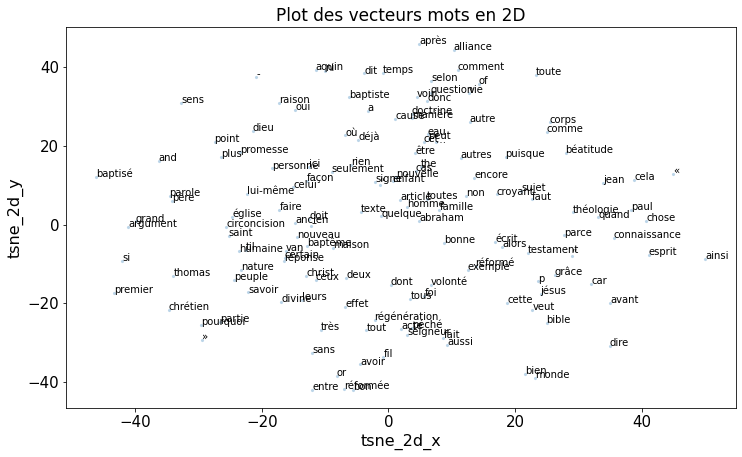

In [20]:
plot_word_vectors_2d(tsne_results, words_vectors_skip_gram.index_to_key, n_kept)

In [ ]:
print(tsne_results[0:50:,0])

[ 32.97364     27.86875      2.6578183   -6.156161    26.759222
  26.850883    16.1331     -18.113335   -18.714615    22.738516
 -17.732666    30.788158   -21.100252    21.00191     40.18455
 -25.64658     11.441761    26.25866     -8.396498    24.155148
   2.2062364  -35.837776   -31.808994    -3.1559381  -15.883595
  11.889427     0.16937323 -17.269344    -4.664543     2.3588793
 -15.474083    14.938675    12.966424    36.691887    32.03494
 -28.764671    14.556421    -5.2187657  -16.172247    -2.6972094
 -24.54941     39.68088     -3.7747867   27.805323    16.432642
  -5.650859    14.336708    -2.8012807   -1.4311023  -29.907084  ]


Utilisation des features word2vec pour la classification

Creation features du modele : moyenne des "mots" d'une phrase

In [ ]:
vocab = model.wv.index_to_key
# len(vocab)
# type(vocab)
# print(vocab)
vocab=list(model.wv.key_to_index.keys())
# vocab
type(vocab)

list

In [ ]:
words_vectors_skip_gram_skip_gram["alliance"] # vecteur des mots, indice par mot (string)

NameError: name 'words_vectors_skip_gram' is not defined

In [ ]:
words_vectors_skip_gram_skip_gram = model_skip_gram.wv
vocab = model_skip_gram.wv.index_to_key
corpus_average_vectors = []
sentence_average_vector = []
sentence_vectors = []
vector_space_dim = 200

for i in range(len(tokens)):
    sentence = tokens[i]
    sentence_words = list(set(vocab) & set(sentence))
    if(sentence_words != []):
        sentence_average_vector = np.mean(words_vectors_skip_gram_skip_gram[sentence_words], axis=0)
        # print("words_vectors_skip_gram_skip_gram[sentence_words] =", words_vectors_skip_gram_skip_gram[sentence_words])
    else:
        print("sentence =", sentence)
        print("sentence_words =", sentence_words)
        sentence_average_vector = np.zeros(vector_space_dim)
    corpus_average_vectors.append(sentence_average_vector)
# print("len(sentence_vectors) =", len(sentence_vectors))
# print("sentence_vectors =", sentence_vectors)
# print("len(sentence_average_vector) =", len(sentence_average_vector))
# len(corpus_average_vectors)
corpus_word2vec_sk = pd.DataFrame(corpus_average_vectors)
corpus_word2vec_sk['id'] = corpus['id']
corpus_word2vec_sk['message'] = corpus['message']
corpus_word2vec_sk["category_bin"] = corpus["category_bin"]
# corpus_word2vec_sk

sentence = ['tortarolohttpssecuregravatarcomavatarbaddffbdfaefbsdmmrg']
sentence_words = []
